In [162]:
import numpy as np
import pandas as pd
import os
from scipy import stats

In [163]:
os.getcwd()

'C:\\Users\\Moataz Wahba\\Desktop'

In [164]:
os.chdir('C:\\Users\\Moataz Wahba\\Desktop\\')

In [165]:
df=pd.read_csv('covid_data44.csv',encoding='latin-1')

In [166]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [167]:
from pandas.api.types import CategoricalDtype
days=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
dailydays = CategoricalDtype(categories=days, ordered=True)
df['weekdays'] = df['weekdays'].astype(dailydays)

In [168]:
#the sum of daily cases and deaths

In [169]:
dfsumofdaily=df[df['country']!='Angola']

In [170]:
stats=dfsumofdaily.groupby("weekdays").agg({"dcases": [np.sum, np.size],'ddeaths': [np.sum, np.size]})

In [171]:
stats

dcases        ddeaths       
               sum   size     sum   size
weekdays                                
Fri       46595529  17540  845991  17540
Sat       37978947  17379  703175  17379
Sun       32401410  17403  557129  17403
Mon       37077697  17428  664765  17428
Tue       41888005  17451  891663  17451
Wed       45725015  17485  902270  17485
Thu       47390198  17505  874322  17505

In [172]:
#the ratio of deaths to cases

In [173]:
cases=df['dcases'].sum()

In [174]:
deaths=df['ddeaths'].sum()

In [175]:
ratio_between_cases_and_deaths= deaths/cases

In [176]:
ratio_between_cases_and_deaths

0.01881828256955733

In [177]:
start_date1='2020-01-01'
end_date1='2020-12-31'
start_date2='2021-01-01'
end_date2='2021-12-31'
c20=(df["date"]>=start_date1) & (df["date"]<=end_date1)
c21=(df["date"]>=start_date2) & (df["date"]<=end_date2)
conditions=[(c20==True),(c21==True)]
values=["2020","2021"]
df["method1year"]=np.select(conditions,values)
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,method1year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021


In [178]:
df['region'].value_counts()

Europe & Central Asia         34358
Sub-Saharan Africa            30674
Latin America & Caribbean     21795
East Asia & Pacific           15056
Middle East & North Africa    14080
South Asia                     5461
North America(region)          1419
Name: region, dtype: int64

In [179]:
from pandas.api.types import CategoricalDtype
regions=['Europe & Central Asia','Sub-Saharan Africa ','Latin America & Caribbean ','East Asia & Pacific','Middle East & North Africa','South Asia','North America(region)']
regionss = CategoricalDtype(categories=regions, ordered=True)
df['region'] = df['region'].astype(regionss)

In [180]:
stats=dfsumofdaily.groupby("region").agg({"dcases": [np.sum],'ddeaths': [np.sum]})

In [181]:
stats

,dcases,ddeaths
,sum,sum
region,,
East Asia & Pacific,18601015,339407
Europe & Central Asia,101999736,1667619
Latin America & Caribbean,47719378,1558734
Middle East & North Africa,17316998,290050
North America(region),57033368,858478
South Asia,39415174,572686
Sub-Saharan Africa,6971132,152341


In [182]:
df['year'] = pd. DatetimeIndex(df['date']). year
df['year']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
122838    2021
122839    2021
122840    2021
122841    2021
122842    2021
Name: year, Length: 122843, dtype: int64

In [183]:
from pandas.api.types import CategoricalDtype
cats=['2020','2021']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['method1year'] = df['method1year'].astype(cat_type)

In [184]:
dfafrica=df[df['continent']=='Africa']

In [185]:
stats=dfafrica.groupby("method1year").agg({"dcases": [np.sum, np.mean,np.std]})
stats

dcases                         
                 sum        mean          std
method1year                                  
2020         2759602  179.989695   812.148803
2021         6989318  361.298423  1454.828779

In [186]:
x= np.array(stats
           )
x

array([[2.75960200e+06, 1.79989695e+02, 8.12148803e+02],
       [6.98931800e+06, 3.61298423e+02, 1.45482878e+03]])

In [187]:
import numpy as np
import scipy 
stats.index

CategoricalIndex(['2020', '2021'], categories=['2020', '2021'], ordered=True, dtype='category', name='method1year')

In [188]:
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])
ci95_hi

[2759614.4049200676, 6989336.587425372]

In [189]:
ci95_lo

[2759589.5950799324, 6989299.412574628]

In [190]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

              dcases                                ci95_hi       ci95_lo
                 sum        mean          std                            
method1year                                                              
2020         2759602  179.989695   812.148803  2.759614e+06  2.759590e+06
2021         6989318  361.298423  1454.828779  6.989337e+06  6.989299e+06


In [191]:
df_ci= pd.DataFrame(stats)
df_ci

dcases                                ci95_hi       ci95_lo
                 sum        mean          std                            
method1year                                                              
2020         2759602  179.989695   812.148803  2.759614e+06  2.759590e+06
2021         6989318  361.298423  1454.828779  6.989337e+06  6.989299e+06

In [192]:
df_ci['method1year']=df_ci.index
df_ci

dcases                                ci95_hi       ci95_lo  \
                 sum        mean          std                               
method1year                                                                 
2020         2759602  179.989695   812.148803  2.759614e+06  2.759590e+06   
2021         6989318  361.298423  1454.828779  6.989337e+06  6.989299e+06   

            method1year  
                         
method1year              
2020               2020  
2021               2021

In [193]:
df_ci.columns


import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['method1year']))


MultiIndex([(     'dcases',  'sum'),
            (     'dcases', 'mean'),
            (     'dcases',  'std'),
            (    'ci95_hi',     ''),
            (    'ci95_lo',     ''),
            ('method1year',     '')],
           )

In [203]:
from pandas.api.types import CategoricalDtype
cats=['Africa','Asia','Europe','North America(continent)','South America(continent)']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['continent'] = df['continent'].astype(cat_type)

In [204]:
df['continent'].value_counts()

Africa                      34677
Asia                        31103
Europe                      29103
North America(continent)    15229
South America(continent)     7985
Name: continent, dtype: int64

In [205]:
dfcontinent=df[df['method1year']=='2020']
stats=dfcontinent.groupby("continent").agg({"dcases": [np.mean, np.std, np.size]})
stats

dcases                     
                                 mean           std   size
continent                                                 
Africa                     179.989695    812.148803  15332
Asia                      1448.863760   9560.899804  14313
Europe                    1783.304743   5020.494465  13408
North America(continent)  3390.453029  19128.794001   6834
South America(continent)  3669.935090   8827.038998   3605

In [206]:
stats.index

CategoricalIndex(['Africa', 'Asia', 'Europe', 'North America(continent)',
                  'South America(continent)'],
                 categories=['Africa', 'Asia', 'Europe', 'North America(continent)', 'South America(continent)'], ordered=True, dtype='category', name='continent')

In [207]:
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])
ci95_hi

[192.84649055020242,
 1605.5148512234239,
 1868.2947745278595,
 3844.0883959580456,
 3958.2164898249844]

In [208]:
ci95_lo

[167.13289896192907,
 1292.2126692125432,
 1698.314712345649,
 2936.8176619875208,
 3381.6536904801474]

In [209]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                               dcases                           ci95_hi  \
                                 mean           std   size                
continent                                                                 
Africa                     179.989695    812.148803  15332   192.846491   
Asia                      1448.863760   9560.899804  14313  1605.514851   
Europe                    1783.304743   5020.494465  13408  1868.294775   
North America(continent)  3390.453029  19128.794001   6834  3844.088396   
South America(continent)  3669.935090   8827.038998   3605  3958.216490   

                              ci95_lo  
                                       
continent                              
Africa                     167.132899  
Asia                      1292.212669  
Europe                    1698.314712  
North America(continent)  2936.817662  
South America(continent)  3381.653690  


In [210]:
df_ci= pd.DataFrame(stats)
df_ci

dcases                           ci95_hi  \
                                 mean           std   size                
continent                                                                 
Africa                     179.989695    812.148803  15332   192.846491   
Asia                      1448.863760   9560.899804  14313  1605.514851   
Europe                    1783.304743   5020.494465  13408  1868.294775   
North America(continent)  3390.453029  19128.794001   6834  3844.088396   
South America(continent)  3669.935090   8827.038998   3605  3958.216490   

                              ci95_lo  
                                       
continent                              
Africa                     167.132899  
Asia                      1292.212669  
Europe                    1698.314712  
North America(continent)  2936.817662  
South America(continent)  3381.653690

In [214]:
df_ci['continent']=df_ci.index
df_ci

dcases                           ci95_hi  \
                                 mean           std   size                
continent                                                                 
Africa                     179.989695    812.148803  15332   192.846491   
Asia                      1448.863760   9560.899804  14313  1605.514851   
Europe                    1783.304743   5020.494465  13408  1868.294775   
North America(continent)  3390.453029  19128.794001   6834  3844.088396   
South America(continent)  3669.935090   8827.038998   3605  3958.216490   

                              ci95_lo                 continent  
                                                                 
continent                                                        
Africa                     167.132899                    Africa  
Asia                      1292.212669                      Asia  
Europe                    1698.314712                    Europe  
North America(continent)  2936.817662  North America(continent)  
South America(continent)  3381.653690  South America(continent)

([<matplotlib.axis.YTick at 0x11ab01019a0>,
 [Text(0, 0, 'Africa'),
  Text(0, 1, 'Asia'),
  Text(0, 2, 'Europe'),
  Text(0, 3, 'North America(continent)'),
  Text(0, 4, 'South America(continent)')])

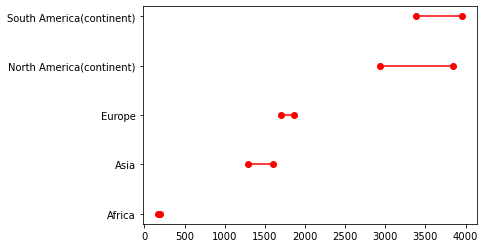

In [217]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['continent']))
